<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [66]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Load the csv file

In [67]:
df = pd.read_csv('Heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0


In [68]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [69]:
#male ,education ,current smoker ,bp meds,prevalent stroke ,prevalent hyp and diabetes 
#the columns which are wrong data types which are not in the format

In [70]:
wrong_specified_dtypes_columns= ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [71]:
for i in wrong_specified_dtypes_columns:
    df[i]=df[i].astype(object)

In [72]:
df.dtypes

male                object
age                  int64
education           object
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [73]:
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
CVD                  0
dtype: int64

In [74]:
percentage_of_null_values = df.isnull().sum()/len(df)*100
percentage_of_null_values

male              0.000000
age               0.000000
education         2.476415
currentSmoker     0.000000
cigsPerDay        0.683962
BPMeds            1.250000
prevalentStroke   0.000000
prevalentHyp      0.000000
diabetes          0.000000
totChol           1.179245
sysBP             0.000000
diaBP             0.000000
BMI               0.448113
heartRate         0.023585
glucose           9.150943
CVD               0.000000
dtype: float64

In [75]:
df = df.dropna(subset=['education', 'BPMeds', 'totChol','cigsPerDay','BMI','heartRate'])

In [76]:
df['glucose']=df['glucose'].fillna(df['glucose'].median()) 

### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
df['CVD'].value_counts(normalize=True)

0   0.850840
1   0.149160
Name: CVD, dtype: float64

<AxesSubplot:xlabel='CVD', ylabel='count'>

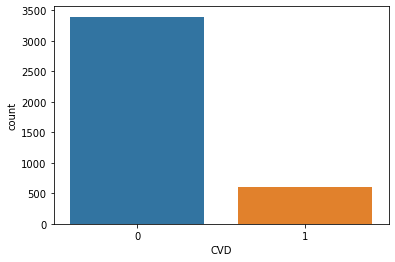

In [78]:
sns.countplot(df['CVD'])

In [79]:
#Imbalanced Data
#target variable contains 85.08% and 14.91%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
df_num = df[['diaBP','sysBP']]

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

df_num_scaled = SS.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled)
df_num_scaled.index= np.arange(0,3989)

df_cat = pd.get_dummies(df[['BPMeds']],drop_first=True)

df_cat.index=np.arange(0,3989)
x = pd.concat([df_num_scaled,df_cat],axis=1)

In [105]:
df.shape

(3989, 16)

In [104]:
x.shape

(3989, 3)

In [81]:
SS = StandardScaler()

In [86]:
df_num_scaled = SS.fit_transform(df_num)
df_num_scaled= np.arange(0,3989)

In [87]:
df_cat = pd.get_dummies(df['BPMeds'],drop_first=True)

In [15]:
df_num = df[['diaBP','sysBP']]
df_num_scaled=df_num.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)

df_num_scaled['BPMeds']=pd.get_dummies(df['BPMeds'],drop_first=True)

y = df['CVD']
x = df_num_scaled

xc= sm.add_constant(x)


x_train,x_test,y_train,y_test = train_test_split(xc,y,random_state=100,test_size=0.2)


logreg=sm.Logit(y_train,x_train).fit()


logreg.summary()

Optimization terminated successfully.
         Current function value: 0.400876
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3187
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                 0.04963
Time:                        14:11:22   Log-Likelihood:                -1279.2
converged:                       True   LL-Null:                       -1346.0
Covariance Type:            nonrobust   LLR p-value:                 9.014e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5223      0.328    -13.769      0.000      -5.166      -3.879
diaBP         -0.0087      0.006     -1.390      0.165      -0.021       0.004
sysBP          0.0265      0.003      7.932      0.000       0.020       0.033
BPMeds         0.2601      0.245      1.063      0.288      -0.219       0.740
==============================================================================
"""

In [16]:
pd.DataFrame(logreg.params,index={'diaBP','sysBP','BPMeds'})

,0
sysBP,0.026485
diaBP,-0.008746
BPMeds,0.260055


In [17]:
#Among three columns sysBP column significantly effects the CVD (target variable)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df_cat = df.select_dtypes(include=[np.object])

x = pd.get_dummies(df_cat,drop_first=True)
y = df['CVD']

xc = sm.add_constant(x)

x_train,x_test,y_train,y_test = train_test_split(xc,y,random_state=100,test_size=0.2)

logreg= sm.Logit(y_train,x_train).fit()

#odds = ln(beta0 + beta1+ beta2 +beta3)

odds_ratio = np.exp(logreg.params)

print(odds_ratio)

Optimization terminated successfully.
         Current function value: 0.397322
         Iterations 6
const               0.098622
male_1              1.631432
education_2.0       0.637287
education_3.0       0.772372
education_4.0       0.835460
currentSmoker_1     1.284580
BPMeds_1.0          1.720737
prevalentStroke_1   2.227999
prevalentHyp_1      2.378663
diabetes_1          2.656008
dtype: float64


In [19]:
#unit change in a variable respectively
#increase the odds of a patient having  CVD. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
x = pd.get_dummies(df['prevalentHyp'],drop_first=True)
y = df['CVD']

xc =sm.add_constant(x)

x_train,x_test,y_train,ytest = train_test_split(xc,y,random_state=100,test_size=0.2)

logreg=sm.Logit(y_train,x_train).fit()

logreg.summary()

Optimization terminated successfully.
         Current function value: 0.407933
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3189
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                 0.03290
Time:                        14:11:22   Log-Likelihood:                -1301.7
converged:                       True   LL-Null:                       -1346.0
Covariance Type:            nonrobust   LLR p-value:                 4.902e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1101      0.069    -30.678      0.000      -2.245      -1.975
1              0.9587      0.101      9.486      0.000       0.761       1.157
==============================================================================
"""

In [21]:
odds_ratio = np.exp(logreg.params)
odds_ratio

const   0.121228
1       2.608362
dtype: float64

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df_num = df.select_dtypes(include=[np.number]).drop(['CVD'],axis=1)
df_num_scaled = df_num.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)
df_cat = df.select_dtypes(include=[np.object])
df_cat_dummy = pd.get_dummies(df_cat,drop_first=True)

X = pd.concat([df_num,df_cat_dummy],axis=1)
y = df['CVD']
xc=sm.add_constant(x)
x_train,x_test,y_train,y_test = train_test_split(xc,y,random_state=100,test_size=0.2)
logreg_full_model = sm.Logit(y_train,x_train).fit()

logreg_full_model.summary()

Optimization terminated successfully.
         Current function value: 0.407933
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3189
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                 0.03290
Time:                        14:11:22   Log-Likelihood:                -1301.7
converged:                       True   LL-Null:                       -1346.0
Covariance Type:            nonrobust   LLR p-value:                 4.902e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1101      0.069    -30.678      0.000      -2.245      -1.975
1              0.9587      0.101      9.486      0.000       0.761       1.157
==============================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
logreg_full_model.params

const   -2.110085
1        0.958722
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
odds_ratio=np.exp(logreg_full_model.params)
odds_ratio

const   0.121228
1       2.608362
dtype: float64

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [26]:
X=pd.concat([df_num,df_cat],axis=1)
y = df.CVD
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)
model_full=LR.fit(X_train_full,y_train_full)
print("Training accuracy")
print(model_full.score(X_train_full,y_train_full))
print("Test accuracy")
print(model_full.score(X_test_full,y_test_full))

Training accuracy
0.8523973675963648
Test accuracy
0.8533834586466166


In [27]:
y_pred_full=LR.predict(X_test_full)
confusion_matrix(y_test_full,y_pred_full)

array([[677,   4],
       [113,   4]], dtype=int64)

In [28]:
accuracy = (677+2)/798
accuracy

0.8508771929824561

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
from sklearn.metrics import cohen_kappa_score

In [30]:
cohen_kappa_score(y_test_full,y_pred_full)

0.0460982038864709

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

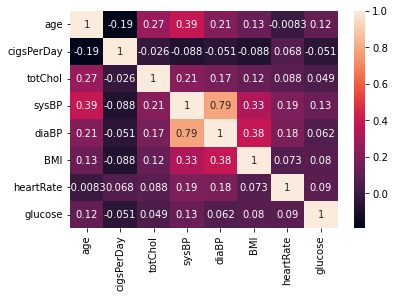

In [31]:
sns.heatmap(df_num.corr(),annot=True)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
df_numeric=df.select_dtypes(include=np.number).drop(['CVD'],axis=1)
num_scaled=df_num.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)
df_num = pd.DataFrame(num_scaled, columns = df_num.columns)
df_cat=df.select_dtypes(include='object')
df_cat=pd.get_dummies(df_cat,drop_first=True)
X=pd.concat([df_num,df_cat],axis=1)

In [34]:
X_cpy  = X.copy()
X.shape

(3989, 17)

In [35]:
vif=pd.DataFrame()
vif['Features']=X_cpy.columns
vif['VIF']=[variance_inflation_factor(X_cpy.values,i) for i in range(X_cpy.shape[1])] 
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,sysBP,125.184946
4,diaBP,115.187752
0,age,33.581680
6,heartRate,32.415002
2,totChol,30.256231
5,BMI,27.770008
7,glucose,18.959811
12,currentSmoker_1,4.895083
1,cigsPerDay,3.987988
15,prevalentHyp_1,2.336560


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()

In [37]:
x_train_rfe=x_train.reset_index()
x_test_rfe=x_test.reset_index()

x_train_rfe = x_train_rfe.iloc[:,1:]
x_test_rfe=x_test_rfe.iloc[:,1:]

rfe_model = RFE(estimator=Lr,n_features_to_select=5)
rfe_model=rfe_model.fit(x_train_rfe,y_train)
feat_index=pd.Series(data=rfe_model.ranking_,index=x_train_rfe.columns)
signi_feat_rfe=feat_index[feat_index==1]
signi_feat_rfe.index

Index(['const', 1], dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
X = X_cpy[['male_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1','diabetes_1']]
Y = df['CVD']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.2)
rfe_model = Lr.fit(X_train,y_train)
y_pred = rfe_model.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.8533834586466166

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       680
           1       1.00      0.01      0.02       118

    accuracy                           0.85       798
   macro avg       0.93      0.50      0.47       798
weighted avg       0.87      0.85      0.79       798



In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_test,y_pred)

0.01680672268907563

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
from sklearn.metrics import roc_curve,auc

In [44]:
df_numeric=df.select_dtypes(include=np.number).drop(['CVD'],axis=1)
num_scaled=df_num.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)
df_num = pd.DataFrame(num_scaled, columns = df_num.columns)
df_cat=df.select_dtypes(include='object')
df_cat=pd.get_dummies(df_cat,drop_first=True)
X=pd.concat([df_num,df_cat],axis=1)
y = df.CVD
Xc = sm.add_constant(X)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(Xc, y, random_state = 1, test_size = 0.2)

In [45]:
logreg_full = sm.Logit(y_train_full, X_train_full).fit()
probas1_ = Lr.fit(X_train_full, y_train_full).predict_proba(X_test_full)

fpr1,tpr1,threshold = roc_curve(y_test_full,probas1_[:,1])
roc_auc1 = auc(fpr1,tpr1)
roc_auc1

Optimization terminated successfully.
         Current function value: 0.374542
         Iterations 7


0.7063769971258957

In [46]:
X=X_cpy[['male_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1','diabetes_1']]
y=df["CVD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
y_pred=Lr.fit(X_train,y_train).predict(X_test)


probas2_ = Lr.fit(X_train, y_train).predict_proba(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.6763369604779297

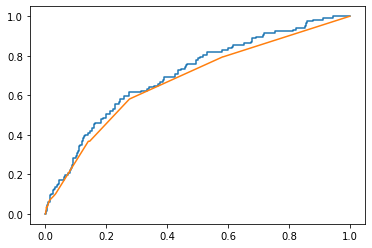

In [47]:
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
X = df[['heartRate']]
y = df['CVD']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.2)
proba = Lr.fit(X_train,y_train).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,proba[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.49858549351944165

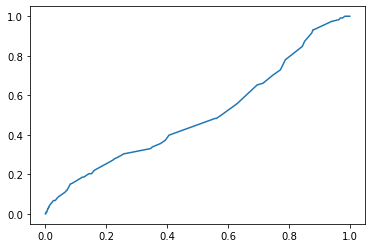

In [49]:
plt.plot(fpr,tpr)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
from sklearn.metrics import log_loss

In [51]:
y_pred=[0 if x<0.5 else 1 for x in proba[:,1]]
log_loss(y_test,y_pred)

5.107237612280026

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
roc_auc1

0.7063769971258957

In [53]:
roc_auc

0.49858549351944165

 full model is better than model with only heartrate

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
probafull=Lr.fit(X_train_full,y_train_full).predict_proba(X_test_full)
y_pred1=[0 if x<0.5 else 1 for x in probafull[:,1]]
log_loss(y_test,y_pred1)

5.540065381103132

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD'],
      dtype='object')

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
LR=LogisticRegression()

In [58]:
s = df['currentSmoker']
i = df['cigsPerDay']
v = pd.get_dummies(s,drop_first=True)
a = pd.concat([s,v],axis=1)
y = df['CVD']
X_train,X_test,y_train,y_test= train_test_split(a,y,random_state=100,test_size=0.2)
model= LR.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [59]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [60]:
precision_score(y_test,y_pred,average=None)

array([0.85213033, 0.        ])

In [61]:
recall_score(y_test,y_pred,average=None)

array([1., 0.])

In [62]:
f1_score(y_test,y_pred,average=None)

array([0.92016238, 0.        ])

<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
y_pred_prob = LR.fit(X_train_full, y_train_full).predict_proba(X_test_full)
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob[:, 1])

youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table['TPR'] - youdens_table['FPR']


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)



youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.615385,0.273128,0.175674,0.342257
1,0.598291,0.258443,0.179121,0.339847
2,0.581197,0.245228,0.186175,0.335969
3,0.555556,0.229075,0.197304,0.326481
4,0.598291,0.273128,0.176162,0.325163


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP
